In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers import Input, ZeroPadding2D,concatenate, Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, UpSampling2D, BatchNormalization, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import h5py, glob
import numpy as np
import itertools
from cnn_utils import *
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(1)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\ekurtoglu\AppData\Local\Continuum\anaconda3\envs\env\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [3]:
### CAE hyp
batch_size = 32
epochs = 200
inChannel = 3
x, y = 88, 120 # height, width
input_img = Input(shape = (x, y, inChannel))
num_class = 11

# Load Data

In [116]:
datapath = 'datasets/128x128/*.hdf5'
all_data = glob.glob(datapath)

ganpath = 'datasets/GAN/*.hdf5'
gandata = glob.glob(ganpath)

data_10 = h5py.File(all_data[0], "r")
data_24 = h5py.File(all_data[1], "r")
data_tobb = h5py.File(all_data[2], "r")
data_77 = h5py.File(all_data[3], "r")

data_77_gan = h5py.File(gandata[0],'r') 

# test_path4 = 'Tobb_dataset/tobb_dataset_128x128.hdf5' # file path for TOBB data  
# testset4   = h5py.File(test_path4, "r")
print('Real Dataset: '+str(all_data))
X_train_10 = np.array(data_10["train_img"])
Y_train_10 = np.array(data_10["train_labels"])
# X_valid_orig = np.array(validset["valid_img"])
# Y_valid_orig = np.array(validset["valid_labels"])
X_test_10 = np.array(data_10["test_img"])
Y_test_10 = np.array(data_10["test_labels"])
print('10 ghz Dataset''s Number of training samples: ', len(Y_train_10))
# print('1. Radar''s Number of validation samples: ', len(X_valid_orig))
print('10 ghz Dataset''s Number of test samples: ', len(Y_test_10))

X_train_24 = np.array(data_24["train_img"])
Y_train_24 = np.array(data_24["train_labels"])
# X_valid_orig2 = np.array(validset2["valid_img"])
# Y_valid_orig2 = np.array(validset2["valid_labels"])
X_test_24 = np.array(data_24["test_img"])
Y_test_24 = np.array(data_24["test_labels"])
print('24 ghz Dataset''s Number of training samples: ', len(X_train_24))
# print('2. Radar''s Number of validation samples: ', len(X_valid_orig2))
print('24 ghz Dataset''s Number of test samples: ', len(X_test_24))

X_train_77 = np.array(data_77["train_img"])
Y_train_77 = np.array(data_77["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_77 = np.array(data_77["test_img"])
Y_test_77 = np.array(data_77["test_labels"])
print('77 ghz Dataset''s Number of training samples: ', len(X_train_77))
# print('3. Radar''s Number of validation samples: ', len(X_valid_orig3))
print('77. Dataset''s Number of test samples: ', len(X_test_77))


X_train_tobb = np.array(data_tobb["train_img"])
Y_train_tobb = np.array(data_tobb["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_tobb = np.array(data_tobb["test_img"])
Y_test_tobb = np.array(data_tobb["test_labels"])
print('4 ghz Dataset''s Number of training samples: ', len(X_train_tobb))
# print('4. Radar''s Number of validation samples: ', len(X_valid_orig4))
print('4 ghz Dataset''s Number of test samples: ', len(X_test_tobb))

print('GAN Dataset: '+str(gandata))

X_train_77_gan = np.array(data_77_gan["train_img"])
Y_train_77_gan = np.array(data_77_gan["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_77_gan = np.array(data_77_gan["test_img"])
Y_test_77_gan = np.array(data_77_gan["test_labels"])
print('77 ghz GAN Dataset''s Number of training samples: ', len(X_train_77_gan))
# print('3. Radar''s Number of validation samples: ', len(X_valid_orig3))
print('77. GAN Dataset''s Number of test samples: ', len(X_test_77_gan))

data_10.close()
data_24.close()
data_77.close()
data_tobb.close()
data_77_gan.close()

Real Dataset: ['datasets/128x128\\10ghz_11class_128x128.hdf5', 'datasets/128x128\\24ghz_11class_128x128.hdf5', 'datasets/128x128\\4ghz_11class_128x128.hdf5', 'datasets/128x128\\77ghz_11class_128x128.hdf5']
10 ghz Datasets Number of training samples:  588
10 ghz Datasets Number of test samples:  147
24 ghz Datasets Number of training samples:  1483
24 ghz Datasets Number of test samples:  636
77 ghz Datasets Number of training samples:  519
77. Datasets Number of test samples:  130
4 ghz Datasets Number of training samples:  564
4 ghz Datasets Number of test samples:  243
GAN Dataset: ['datasets/GAN\\77_GAN_128x128.hdf5']
77 ghz GAN Datasets Number of training samples:  2031
77. GAN Datasets Number of test samples:  131


### Examine the shapes of data

In [117]:
x_train_10 = X_train_10/255.
# X_valid = X_valid_orig/255.
x_test_10 = X_test_10/255.
y_train_10 = convert_to_one_hot(Y_train_10, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_10 = convert_to_one_hot(Y_test_10, num_class).T
print ("X_train_10 shape: " + str(x_train_10.shape))
print ("Y_train_10 shape: " + str(y_train_10.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_10 shape: " + str(x_test_10.shape))
print ("Y_test_10 shape: " + str(y_test_10.shape)+"\n\n")

x_train_24 = X_train_24/255.
# X_valid = X_valid_orig/255.
x_test_24 = X_test_24/255.
y_train_24 = convert_to_one_hot(Y_train_24, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_24 = convert_to_one_hot(Y_test_24, num_class).T
print ("X_train_24 shape: " + str(x_train_24.shape))
print ("Y_train_24 shape: " + str(y_train_24.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_24 shape: " + str(x_test_24.shape))
print ("Y_test_24 shape: " + str(y_test_24.shape)+"\n\n")

x_train_77 = X_train_77/255.
# X_valid = X_valid_orig/255.
x_test_77 = X_test_77/255.
y_train_77 = convert_to_one_hot(Y_train_77, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_77 = convert_to_one_hot(Y_test_77, num_class).T
print ("X_train_77 shape: " + str(x_train_77.shape))
print ("Y_train_77 shape: " + str(y_train_77.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_77 shape: " + str(x_test_77.shape))
print ("Y_test_77 shape: " + str(y_test_77.shape)+"\n\n")


x_train_tobb = X_train_tobb/255.
# X_valid = X_valid_orig/255.
x_test_tobb = X_test_tobb/255.
y_train_tobb = convert_to_one_hot(Y_train_tobb, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_tobb = convert_to_one_hot(Y_test_tobb, num_class).T
print ("X_train_tobb shape: " + str(x_train_tobb.shape))
print ("Y_train_tobb shape: " + str(y_train_tobb.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_tobb shape: " + str(x_test_tobb.shape))
print ("Y_test_tobb shape: " + str(y_test_tobb.shape)+"\n\n")

x_train_77_gan = X_train_77_gan/255.
# X_valid = X_valid_orig/255.
x_test_77_gan = X_test_77_gan/255.
y_train_77_gan = convert_to_one_hot(Y_train_77_gan, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_77_gan = convert_to_one_hot(Y_test_77_gan, num_class).T
print ("X_train_77_gan shape: " + str(x_train_77_gan.shape))
print ("Y_train_77_gan shape: " + str(y_train_77_gan.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_77_gan shape: " + str(x_test_77_gan.shape))
print ("Y_test_77_gan shape: " + str(y_test_77_gan.shape)+"\n\n")

X_train_10 shape: (588, 128, 128, 3)
Y_train_10 shape: (588, 11)
X_test_10 shape: (147, 128, 128, 3)
Y_test_10 shape: (147, 11)


X_train_24 shape: (1483, 128, 128, 3)
Y_train_24 shape: (1483, 11)
X_test_24 shape: (636, 128, 128, 3)
Y_test_24 shape: (636, 11)


X_train_77 shape: (519, 128, 128, 3)
Y_train_77 shape: (519, 11)
X_test_77 shape: (130, 128, 128, 3)
Y_test_77 shape: (130, 11)


X_train_tobb shape: (564, 128, 128, 3)
Y_train_tobb shape: (564, 11)
X_test_tobb shape: (243, 128, 128, 3)
Y_test_tobb shape: (243, 11)


X_train_77_gan shape: (2031, 128, 128, 3)
Y_train_77_gan shape: (2031, 11)
X_test_77_gan shape: (131, 128, 128, 3)
Y_test_77_gan shape: (131, 11)




## Select Dataset

In [118]:
# set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz and '3' for 4GHz USRP TOBB Data
def select_data(radar):

    if radar==10:
        X_Train = x_train_10
        Y_Train = y_train_10
    #     X_valid = X_valid
    #     Y_valid = Y_valid
        X_Test = x_test_10
        Y_Test = y_test_10
    elif radar==24:
        X_Train = x_train_24
        Y_Train = y_train_24
    #     X_valid = X_valid2
    #     Y_valid = Y_valid2
        X_Test = x_test_24
        Y_Test = y_test_24
    elif radar==77: 
        X_Train = x_train_77
        Y_Train = y_train_77
    #     X_valid = X_valid3
    #     Y_valid = Y_valid3
        X_Test = x_test_77
        Y_Test = y_test_77
    elif radar==4: 
        X_Train = x_train_tobb
        Y_Train = y_train_tobb
    #     X_valid = X_valid4
    #     Y_valid = Y_valid4
        X_Test = x_test_tobb
        Y_Test = y_test_tobb
    elif radar=='77_gan': 
        X_Train = x_train_77_gan
        Y_Train = y_train_77_gan
    #     X_valid = X_valid3
    #     Y_valid = Y_valid3
        X_Test = x_test_77_gan
        Y_Test = y_test_77_gan
    return X_Train, Y_Train, X_Test, Y_Test

In [119]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='Training')
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='Validation')
    plt.legend(loc=0)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
#     fig.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-acc.png')
    plt.close(fig)
    # summarize history for loss
    fig2 = plt.figure()
    plt.plot(range(1,epochs+1),history.history['loss'],label='Training')
    plt.plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
    plt.legend(loc=0)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
#     fig2.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-loss.png')
    plt.close(fig2)

## Encoder and Decoder

In [198]:
def encoder(input_img):
    #encoder
    #input = 128 x 128 x 3 (wide and thin) 128x128x3
    conv01 = Conv2D(8, (3, 3), strides=(1, 1), activation='relu', padding='same')(input_img) # 128x128x8
    conv02 = Conv2D(8, (9, 9), activation='relu', padding='same')(input_img)
    out01  = concatenate([conv01,conv02],axis=-1)
    pool01 = MaxPooling2D(pool_size=(2, 2))(out01) #14 x 14 x 32, 64x64x8
    
    conv1 = Conv2D(8, (3, 3), strides=(1, 1), activation='relu', padding='same')(pool01) # 128x128x8
    conv2 = Conv2D(8, (9, 9), activation='relu', padding='same')(pool01)
    out1  = concatenate([conv1,conv2],axis=-1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32, 64x64x8
    
#     conv3 = Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same')(pool1) # 64x64x16
# #     conv4 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool1)
# #     out2  = concatenate([conv3,conv4],axis=-1)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv3) # 16x16x16
    
#     conv5 = Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same')(pool2) # 64x64x16
# #     conv4 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool2)
# #     out2  = concatenate([conv5,conv4],axis=-1)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv5) # 16x16x16
    
    return pool1

def decoder(pool2):    
    #decoder
    conv9 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2) # 16x16x16
    conv10 = Conv2D(8, (9, 9), activation='relu', padding='same')(pool2)
    out5  = concatenate([conv9,conv10], axis=-1)
    up2   = UpSampling2D((2,2))(out5) # 64x64x16
    
    conv11 = Conv2D(8, (3, 3), activation='relu', padding='same')(up2) # 64x64x8
    conv12 = Conv2D(8, (9, 9), activation='relu', padding='same')(up2)
    out6  = concatenate([conv11,conv12], axis=-1)
    up3 = UpSampling2D((2,2))(out6) #  128x128x8
#     zero = ZeroPadding2D(padding=(1, 1), data_format=None)(up3)
    
#     conv17 = Conv2D(16, (3, 3), activation='relu', padding='same')(up3) # 64x64x8
# #     conv18 = Conv2D(32, (9, 9), activation='relu', padding='same')(up3)
# #     out7  = concatenate([conv17,conv18], axis=-1)
#     up4 = UpSampling2D((2,2))(conv17) #  128x128x8
    
#     conv19 = Conv2D(16, (3, 3), activation='relu', padding='same')(up4) # 64x64x8
# #     conv20 = Conv2D(8, (9, 9), activation='relu', padding='same')(up4)
# #     out7  = concatenate([conv19,conv20], axis=-1)
#     up5 = UpSampling2D((2,2))(conv19) #  128x128x8
    
    decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(up3) # 128 x 128 x 3 / Conv2D(1, (3, 3)
    
    return decoded

def encoder77(input_img):
    #encoder
    #input = 128 x 128 x 3 (wide and thin) 128x128x3
    conv01 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) # 128x128x8
    conv02 = Conv2D(8, (9, 9), activation='relu', padding='same')(input_img)
    out01  = concatenate([conv01,conv02],axis=-1)
    pool01 = MaxPooling2D(pool_size=(4, 4))(out01) #14 x 14 x 32, 64x64x8
    
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool01) # 128x128x8
    conv2 = Conv2D(16, (9, 9), activation='relu', padding='same')(pool01)
    out1  = concatenate([conv1,conv2],axis=-1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(out1) #14 x 14 x 32, 64x64x8
    
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) # 64x64x16
    conv4 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool1)
    out2  = concatenate([conv3,conv4],axis=-1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(out2) # 16x16x16

    return pool2

def decoder77(pool3):    
    #decoder
    conv9 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool3) # 16x16x16
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool3)
    out5  = concatenate([conv9,conv10], axis=-1)
    up2   = UpSampling2D((2,2))(out5) # 64x64x16
    
    conv11 = Conv2D(16, (9, 9), activation='relu', padding='same')(up2) # 64x64x8
    conv12 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
    out6  = concatenate([conv11,conv12], axis=-1)
    up3 = UpSampling2D((2,2))(out6) #  128x128x8
    
    conv17 = Conv2D(8, (9, 9), activation='relu', padding='same')(up3) # 64x64x8
    conv18 = Conv2D(8, (3, 3), activation='relu', padding='same')(up3)
    out7  = concatenate([conv17,conv18], axis=-1)
    up5 = UpSampling2D((4,4))(out7) #  128x128x8
    
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up5) # 128 x 128 x 3 / Conv2D(1, (3, 3)
    return decoded
def encoderMNIST(input_img):
    #encoder
    #input = 128 x 128 x 3 (wide and thin) 128x128x3
    conv01 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) # 128x128x8
#     conv02 = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
#     out01  = concatenate([conv01,conv02],axis=-1)
    pool01 = MaxPooling2D(pool_size=(2, 2))(conv01) #14 x 14 x 32, 64x64x8
    
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool01) # 128x128x8
#     conv2 = Conv2D(32, (1, 1), activation='relu', padding='same')(pool01)
#     out1  = concatenate([conv1,conv2],axis=-1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(out1) #14 x 14 x 32, 64x64x8
    
#     conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) # 64x64x16
#     conv4 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool1)
#     out2  = concatenate([conv3,conv4],axis=-1)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(out2) # 16x16x16
    
    return pool01

def decoderMNIST(pool2):    
    #decoder
#     conv9 = Conv2D(32, (1, 1), activation='relu', padding='same')(pool2) # 16x16x16
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
#     out5  = concatenate([conv9,conv10], axis=-1)
    up2   = UpSampling2D((2,2))(conv10) # 64x64x16
    
#     conv11 = Conv2D(32, (9, 9), activation='relu', padding='same')(up2) # 64x64x8
#     conv12 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
#     out6  = concatenate([conv11,conv12], axis=-1)
#     up3 = UpSampling2D((2,2))(out6) #  128x128x8
    
#     conv17 = Conv2D(32, (9, 9), activation='relu', padding='same')(up3) # 64x64x8
#     conv18 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
#     out7  = concatenate([conv17,conv18], axis=-1)
#     up5 = UpSampling2D((2,2))(out7) #  128x128x8
    
    decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(up2) # 128 x 128 x 3 / Conv2D(1, (3, 3)
    
    return decoded
def encoder6(input_img):
    #encoder
    #input = 128 x 128 x 3 (wide and thin) 128x128x3
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) # 128x128x8
    conv2 = Conv2D(16, (9, 9), activation='relu', padding='same')(input_img)
    out1  = concatenate([conv1,conv2],axis=-1)
    pool1 = MaxPooling2D(pool_size=(4, 4))(out1) #14 x 14 x 32, 64x64x8
    
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) # 64x64x16
    conv4 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool1)
    out2  = concatenate([conv3,conv4],axis=-1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(out2) # 16x16x16
    
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2) # 16x16x32 
    conv6 = Conv2D(64, (5, 5), activation='relu', padding='same')(pool2)
    out3  = concatenate([conv5,conv6],axis=-1)
    pool3 = MaxPooling2D(pool_size=(2, 2))(out3) # 4x4x32  (small and thick)
    
    return pool3

def decoder6(pool3):    
    #decoder
    
    conv7 = Conv2D(64, (5, 5), activation='relu', padding='same')(pool3) # 4x4x32
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool3)
    out4  = concatenate([conv7,conv8], axis=-1)
    up1   = UpSampling2D((2,2))(out4) #  16x16x32
    
    conv9 = Conv2D(32, (9, 9), activation='relu', padding='same')(up1) # 16x16x16
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    out5  = concatenate([conv9,conv10], axis=-1)
    up2   = UpSampling2D((2,2))(out5) # 64x64x16
    
    conv11 = Conv2D(16, (9, 9), activation='relu', padding='same')(up2) # 64x64x8
    conv12 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
    out6  = concatenate([conv11,conv12], axis=-1)
    up3 = UpSampling2D((4,4))(out6) #  128x128x8
    
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3) # 128 x 128 x 3 / Conv2D(1, (3, 3)
    return decoded

def encoderTobb(input_img):
    #encoder
    #input = 128 x 128 x 3 (wide and thin) 128x128x3
    conv01 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) # 128x128x8
    conv02 = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
    out01  = concatenate([conv01,conv02],axis=-1)
    pool01 = MaxPooling2D(pool_size=(2, 2))(out01) #14 x 14 x 32, 64x64x8
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool01) # 128x128x8
    conv2 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool01)
    out1  = concatenate([conv1,conv2],axis=-1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(out1) #14 x 14 x 32, 64x64x8
    
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) # 64x64x16
    conv4 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool1)
    out2  = concatenate([conv3,conv4],axis=-1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(out2)
    
    return pool2

def decoderTobb(pool2):    
    #decoder
    
    conv9 = Conv2D(32, (9, 9), activation='relu', padding='same')(pool2) # 16x16x16
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
    out5  = concatenate([conv9,conv10], axis=-1)
    up2   = UpSampling2D((2,2))(out5) # 64x64x16
    
    conv11 = Conv2D(32, (9, 9), activation='relu', padding='same')(up2) # 64x64x8
    conv12 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    out6  = concatenate([conv11,conv12], axis=-1)
    up3 = UpSampling2D((2,2))(out6) #  128x128x8
    
    conv17 = Conv2D(32, (9, 9), activation='relu', padding='same')(up3) # 64x64x8
    conv18 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
    out7  = concatenate([conv17,conv18], axis=-1)
    up5 = UpSampling2D((2,2))(out7) #  128x128x8
    
    decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(up5) # 128 x 128 x 3 / Conv2D(1, (3, 3)
    return decoded

In [199]:
autoencoder = Model(input_img_128x128, decoder(encoder(input_img_128x128)))
# define optimiz75
lr = 0.001
optim = Adam(lr=lr) # decay rate = 5e-06 for xethru
# autoencoder.compile(loss='categorical_crossentropy', optimizer = optim, metrics=['accuracy'])
autoencoder.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

In [200]:
autoencoder.summary()

Model: "model_146"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1533 (Conv2D)            (None, 128, 128, 8)  224         input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_1534 (Conv2D)            (None, 128, 128, 8)  1952        input_13[0][0]                   
__________________________________________________________________________________________________
concatenate_499 (Concatenate)   (None, 128, 128, 16) 0           conv2d_1533[0][0]                
                                                                 conv2d_1534[0][0]        

# Custom CAEs

In [208]:
def encoderX(input_img,depth,num_filter):
    #encoder
    #input = 128 x 128 x 3 (wide and thin) 128x128x3
    
    for i in range(depth):
        conv01 = Conv2D(num_filter, (3, 3), strides=(1, 1), activation='relu', padding='same')(input_img) # 128x128x8
        conv02 = Conv2D(num_filter, (9, 9), activation='relu', padding='same')(input_img)
        out01  = concatenate([conv01,conv02],axis=-1)
        pool = MaxPooling2D(pool_size=(2, 2))(out01) #14 x 14 x 32, 64x64x8
        input_img = pool
    
    return input_img

def decoderX(pool,depth,num_filter):    
    #decoder
    for i in range(depth):
        conv9 = Conv2D(num_filter, (3, 3), activation='relu', padding='same')(pool) # 16x16x16
        conv10 = Conv2D(num_filter, (9, 9), activation='relu', padding='same')(pool)
        out5  = concatenate([conv9,conv10], axis=-1)
        up   = UpSampling2D((2,2))(out5) # 64x64x16
        pool = up
    
    decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(up) # 128 x 128 x 3 / Conv2D(1, (3, 3)
    
    return decoded

In [209]:
depth = 3
num_filter = 16
autoencoder = Model(input_img_128x128, decoderX(encoderX(input_img_128x128,depth,num_filter),depth,num_filter))
autoencoder.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
autoencoder.summary()

Model: "model_150"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1598 (Conv2D)            (None, 128, 128, 16) 448         input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_1599 (Conv2D)            (None, 128, 128, 16) 3904        input_13[0][0]                   
__________________________________________________________________________________________________
concatenate_529 (Concatenate)   (None, 128, 128, 32) 0           conv2d_1598[0][0]                
                                                                 conv2d_1599[0][0]        

# Train CAE + CNN Bulk

In [ ]:
depth = [2, 3, 4]
num_filter = [8, 16, 32]
radars = [10,24,77]
epochs = 100
batch_size = 32
acc_hist = []
lr = 0.001
optim = Adam(lr=lr)
im_width = 128
im_height = 128
inChannel = 3
input_img = Input(shape = (im_width, im_height, inChannel)) 
num_class = 11

for i in range(len(radars)):
    radar = radars[i]
    (X_train, Y_train, X_test, Y_test) = select_data(radar)
    for d in range(len(depth)):
        for f in range(len(num_filter)):
            
            autoencoder = Model(input_img, decoderX(encoderX(input_img,depth[d],num_filter[f]),depth[d],num_filter[f]))
            autoencoder.compile(loss='mean_squared_error', optimizer = optim, metrics=['accuracy'])

            autoencoder_train = autoencoder.fit(X_train, X_train, validation_data = (X_test,X_test), batch_size=batch_size,epochs=epochs, verbose=0) 
            
            model2 = Model(input_img , outputs=autoencoder.layers[4*depth[d]].output)
            model = Sequential()

            model.add(model2)
            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dropout(0.5))

            model.add(Dense(128, activation='relu'))
            model.add(Dropout(0.5))

            model.add(Dense(num_class))
            model.add(Activation('softmax'))

            
            model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
            history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            validation_data=(X_test, Y_test)
#                                     callbacks = [PlotLossesCallback()]
                                 )
            acc = history.history['val_accuracy'][-1]
            acc_hist.append(acc)
                    
            MODEL_FILE = "models/128x128/Auto/9x9_3x3/"+str(radars[i])+" GHz "+str(depth[d])+"depth "+str(num_filter[f])+"filter"+  str(num_class)+"_class CAE.json" # save path
            WEIGHT_FILE ="models/128x128/Auto/9x9_3x3/"+str(radars[i])+" GHz "+str(depth[d])+"depth "+str(num_filter[f])+"filter"+  str(num_class)+"_class CAE.h5" # save path

            model_json = autoencoder.to_json()
            with open(MODEL_FILE, "w") as json_file:
                json_file.write(model_json)
            acc = history.history['val_accuracy'][-1]
            acc_hist.append(acc)
            autoencoder.save_weights(WEIGHT_FILE)
            
            print('Parameters for '+str(radar) +' GHz: Depth = '+str(depth[d])+', Num_filter = '+str(num_filter[f])+
                  ', Accuracy = '+str(acc))

Parameters for 10 GHz: Depth = 2, Num_filter = 8, Accuracy = 0.6938775777816772
Parameters for 10 GHz: Depth = 2, Num_filter = 16, Accuracy = 0.7210884094238281
Parameters for 10 GHz: Depth = 2, Num_filter = 32, Accuracy = 0.7142857313156128
Parameters for 10 GHz: Depth = 3, Num_filter = 8, Accuracy = 0.8095238208770752
Parameters for 10 GHz: Depth = 3, Num_filter = 16, Accuracy = 0.07482992857694626
Parameters for 10 GHz: Depth = 3, Num_filter = 32, Accuracy = 0.07482992857694626
Parameters for 10 GHz: Depth = 4, Num_filter = 8, Accuracy = 0.7891156673431396
Parameters for 10 GHz: Depth = 4, Num_filter = 16, Accuracy = 0.7551020383834839
Parameters for 10 GHz: Depth = 4, Num_filter = 32, Accuracy = 0.7687074542045593
Parameters for 24 GHz: Depth = 2, Num_filter = 8, Accuracy = 0.12106918543577194
Parameters for 24 GHz: Depth = 2, Num_filter = 16, Accuracy = 0.12106918543577194
Parameters for 24 GHz: Depth = 2, Num_filter = 32, Accuracy = 0.12106918543577194
Parameters for 24 GHz: Dept

# Train GAN dataset

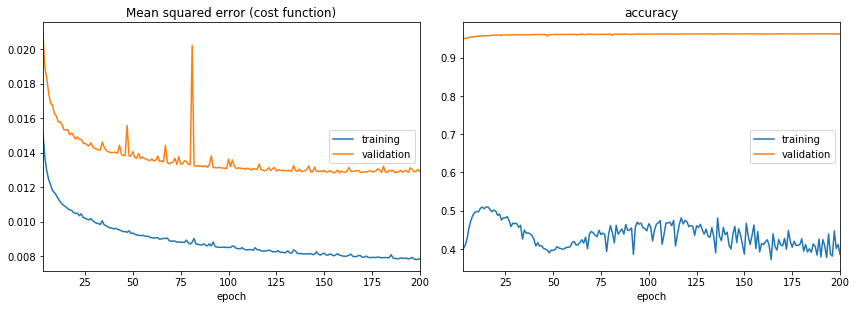

Mean squared error (cost function):
training   (min:    0.008, max:    0.055, cur:    0.008)
validation (min:    0.013, max:    0.033, cur:    0.013)

accuracy:
training   (min:    0.247, max:    0.510, cur:    0.385)
validation (min:    0.942, max:    0.963, cur:    0.963)
Result for 77_gan GHz dataset
Saved model & weights for 77 GHz with accuracy of 0.9625672698020935


In [114]:
radar = '77_gan' # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz and '3' for 4GHz USRP TOBB Data
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = 200

input_img_128x128 = Input(shape = (128, 128, inChannel)) # width, height, channel
autoencoder = Model(input_img_128x128, decoder(encoder(input_img_128x128)))
autoencoder.compile(loss='mean_squared_error', optimizer = optim, metrics=['accuracy'])
    
autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,epochs=epochs, validation_data = (X_test,X_test), verbose=1, callbacks = [PlotLossesCallback()])
print("Result for "+str(radar)+" GHz dataset") ## validation_data = (X_test,X_test),

MODEL_FILE = "models/77 GAN CAE.json" # save path
WEIGHT_FILE ="models/77 GAN CAE.h5" # save path

model_json = autoencoder.to_json()
with open(MODEL_FILE, "w") as json_file:
    json_file.write(model_json)
acc = autoencoder_train.history['val_accuracy'][-1]
autoencoder.save_weights(WEIGHT_FILE)
print("Saved model & weights for "+str(radars[i])+' GHz with accuracy of '+str(acc))

# MNIST

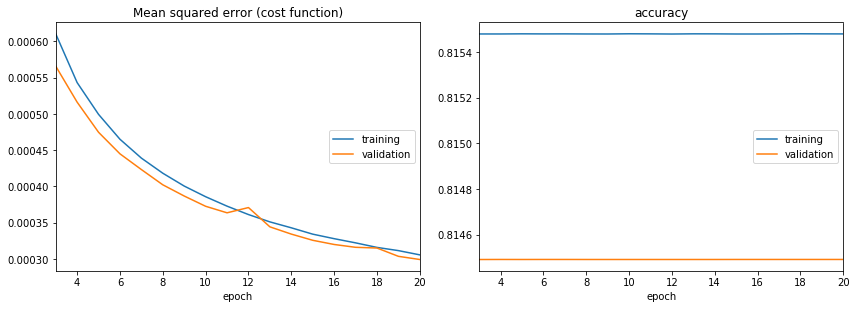

Mean squared error (cost function):
training   (min:    0.000, max:    0.002, cur:    0.000)
validation (min:    0.000, max:    0.001, cur:    0.000)

accuracy:
training   (min:    0.815, max:    0.815, cur:    0.815)
validation (min:    0.814, max:    0.814, cur:    0.814)
Saved model & weights for 77 GHz with accuracy of 0.8144918084144592
Accuracy for model & weights for 77 GHz with accuracy of: 0.8144918084144592


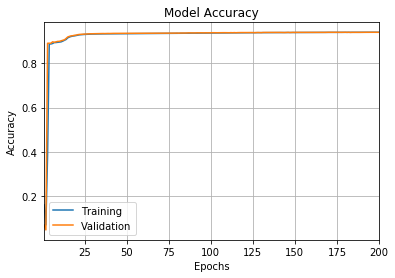

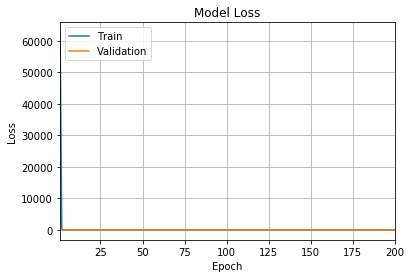

In [73]:
from keras.datasets import mnist
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows = 28
img_cols = 28
num_classes2 = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = convert_to_one_hot(y_train, num_classes2).T
y_test = convert_to_one_hot(y_test, num_classes2).T

input_img2 = Input(shape = (28, 28,1))

autoencoder = Model(input_img2, decoderMNIST(encoderMNIST(input_img2)))
autoencoder.compile(loss='mean_squared_error', optimizer = optim, metrics=['accuracy'])

autoencoder_train = autoencoder.fit(x_train, x_train, validation_data = (x_test,x_test), batch_size=128,epochs=20, verbose=1, callbacks = [PlotLossesCallback()]) 

MODEL_FILE = "models/88x120 CAE/MNIST CAE.json" # save path
WEIGHT_FILE ="models/88x120 CAE/MNIST CAE.h5" # save path

model_json = autoencoder.to_json()
with open(MODEL_FILE, "w") as json_file:
    json_file.write(model_json)
acc = autoencoder_train.history['val_accuracy'][-1]
acc_hist.append(acc)
autoencoder.save_weights(WEIGHT_FILE)
print("Saved model & weights for "+str(radars[i])+' GHz with accuracy of '+str(acc))
hist_hist.append(autoencoder_train)
print("Accuracy for model & weights for "+str(radars[i])+' GHz with accuracy of: '+str(acc))
plot_fig(1,hist_hist[i])


# Train for all datasets

Saved model & weights for 10 GHz with accuracy of 0.9809865355491638
Accuracy for model & weights for 10 GHz with accuracy of: 0.9809865355491638


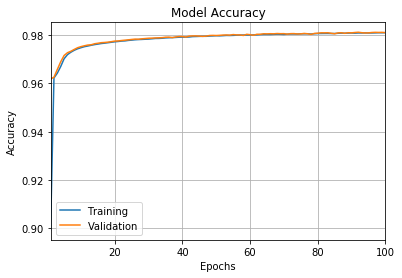

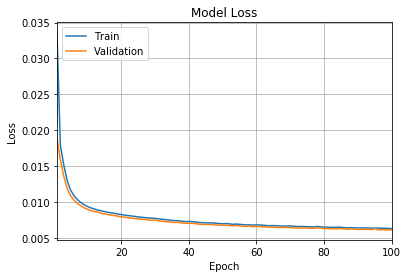

Saved model & weights for 24 GHz with accuracy of 0.9045998454093933
Accuracy for model & weights for 24 GHz with accuracy of: 0.9045998454093933


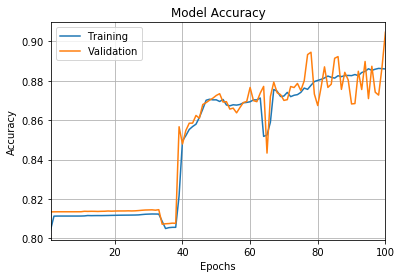

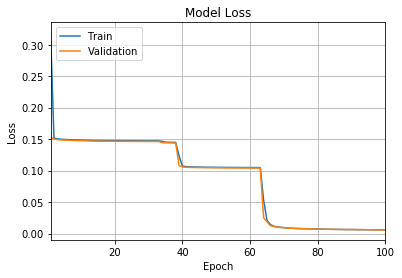

Saved model & weights for 77 GHz with accuracy of 0.9495248794555664
Accuracy for model & weights for 77 GHz with accuracy of: 0.9495248794555664


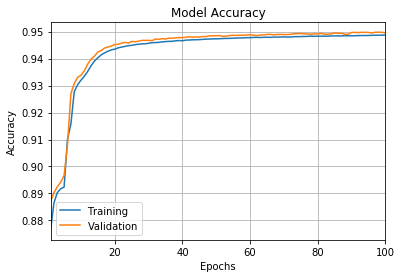

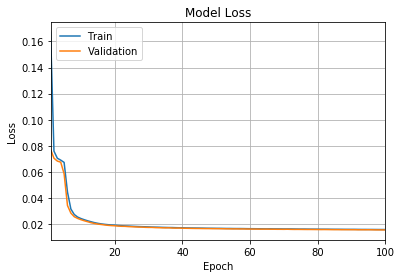

In [201]:
radars = [10,24,77]
epochs = 100
acc_hist = []
lr = 0.001
optim = Adam(lr=lr)     
hist_hist = []
im_width = 128
im_height = 128
inChannel = 3
input_img = Input(shape = (im_width, im_height, inChannel)) 
for i in range(len(radars)):
    radar = radars[i]
    (X_train, Y_train, X_test, Y_test) = select_data(radar)
    
    autoencoder = Model(input_img, decoder(encoder(input_img)))
    autoencoder.compile(loss='mean_squared_error', optimizer = optim, metrics=['accuracy'])

    autoencoder_train = autoencoder.fit(X_train, X_train, validation_data = (X_test,X_test), batch_size=batch_size,epochs=epochs, verbose=0) 
    
    MODEL_FILE = "models/128x128/"+str(radars[i])+" GHz "+str(num_class)+"_class CAE.json" # save path
    WEIGHT_FILE ="models/128x128/"+str(radars[i])+" GHz "+str(num_class)+"_class CAE.h5" # save path

    model_json = autoencoder.to_json()
    with open(MODEL_FILE, "w") as json_file:
        json_file.write(model_json)
    acc = autoencoder_train.history['val_accuracy'][-1]
    acc_hist.append(acc)
    autoencoder.save_weights(WEIGHT_FILE)
    print("Saved model & weights for "+str(radars[i])+' GHz with accuracy of '+str(acc))
    hist_hist.append(autoencoder_train)
    print("Accuracy for model & weights for "+str(radars[i])+' GHz with accuracy of: '+str(acc))
    plot_fig(1,hist_hist[i])
    

## Visualize Results

In [150]:
pred = autoencoder.predict(X_test)
pred.shape

(130, 128, 128, 3)

Test Images


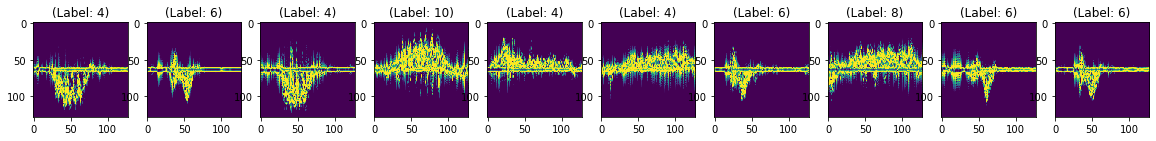

Reconstruction of Test Images


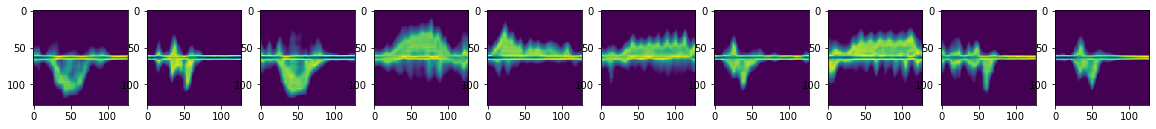

In [151]:
Y_test_label = np.argmax(Y_test, axis = 1)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i, ..., 1]) # , cmap='gray'=0, colored =1
    curr_lbl = Y_test_label[i]
    plt.title("(Label: " + str(Y_test_label[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 1]) # , cmap='gray'  
plt.show()

#### Save the trained CAE model

In [24]:

MODEL_FILE = "models/88x120 CAE/"+str(radar)+" GHz "+str(num_class)+"_class CAE.json" # save path
WEIGHT_FILE ="models/88x120 CAE/"+str(radar)+" GHz "+str(num_class)+"_class CAE.h5" # save path

model_json = autoencoder.to_json()
with open(MODEL_FILE, "w") as json_file:
    json_file.write(model_json)

autoencoder.save_weights(WEIGHT_FILE)
print("Saved model")

Saved model
